 # Transfer Learning VGG16 using Feature Extraction

In [2]:
!nvidia-smi

Sun May 14 02:04:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import tensorflow as tf
print(tf.__version__)

2.12.0


# Libraries

In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image  import ImageDataGenerator, load_img
import numpy as np
from glob import glob

In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
root_path = '/content/drive/MyDrive/flowers'

In [8]:
pwd

'/content'

In [9]:
import os

In [10]:
os.chdir(root_path)

In [11]:
pwd

'/content/drive/MyDrive/flowers'

Image Work

In [12]:
image_size = [224,224]

In [13]:
train_path = 'flowers/train'
validation_path = 'flowers/validation'

# Importing  VGG16 

In [14]:
vgg16 = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=image_size + [3],
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [15]:
for layer in vgg16.layers:
  print(layer)

In [16]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [17]:
for layer in vgg16.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [18]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
from glob import glob

In [20]:
# Folder
folders = glob('*')

In [21]:
folders

['validation', 'train']

In [22]:
class_types = glob('train/*')

In [23]:
class_types

['train/tulip',
 'train/dandelion',
 'train/daisy',
 'train/rose',
 'train/sunflower']

In [24]:
len(class_types)

5

In [25]:
model = Sequential()

In [26]:
model.add(vgg16)
model.add(Flatten())

In [27]:
model.add(Dense(units = 64, activation = 'relu'))

In [28]:
model.add(Dense(units = 112, activation = 'relu'))

In [29]:
model.add(Dense(units = 256, activation = 'relu'))

In [30]:
model.add(Dense(units = len(class_types), activation = 'softmax'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dense_1 (Dense)             (None, 112)               7280      
                                                                 
 dense_2 (Dense)             (None, 256)               28928     
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 16,357,877
Trainable params: 1,643,189
Non

In [32]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [33]:
train_datagen = ImageDataGenerator(rescale = 1./225, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)


test_data = ImageDataGenerator(rescale = 1./255)


In [34]:
!pwd

/content/drive/MyDrive/flowers


In [41]:
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 256,
                                                 class_mode = 'categorical')

Found 600 images belonging to 5 classes.


In [42]:
test_set = test_data.flow_from_directory('validation',
                                            target_size = (224, 224),
                                            batch_size = 256,
                                            class_mode = 'categorical')

Found 300 images belonging to 5 classes.


In [43]:
len(training_set)

3

In [44]:
len(test_set)

2

In [45]:
history = model.fit(training_set, validation_data = test_set, epochs = 20, validation_steps=len(test_set),steps_per_epoch=len(training_set))

Epoch 1/20
3/3 [==============================] - 372s 130s/step - loss: 1.6151 - accuracy: 0.2167 - val_loss: 1.4558 - val_accuracy: 0.3033
Epoch 2/20
3/3 [==============================] - 13s 4s/step - loss: 1.3506 - accuracy: 0.4233 - val_loss: 1.2049 - val_accuracy: 0.6333
Epoch 3/20
3/3 [==============================] - 16s 5s/step - loss: 1.0913 - accuracy: 0.6283 - val_loss: 1.0548 - val_accuracy: 0.5700
Epoch 4/20
3/3 [==============================] - 14s 6s/step - loss: 0.8705 - accuracy: 0.6817 - val_loss: 0.9142 - val_accuracy: 0.6933
Epoch 5/20
3/3 [==============================] - 16s 7s/step - loss: 0.6913 - accuracy: 0.7533 - val_loss: 0.8674 - val_accuracy: 0.6967
Epoch 6/20
3/3 [==============================] - 12s 4s/step - loss: 0.5971 - accuracy: 0.7867 - val_loss: 0.8048 - val_accuracy: 0.7300
Epoch 7/20
3/3 [==============================] - 13s 4s/step - loss: 0.4943 - accuracy: 0.8233 - val_loss: 0.9395 - val_accuracy: 0.7133
Epoch 8/20
3/3 [===============

In [47]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.615052,0.216667,1.455811,0.303333
1,1.350649,0.423333,1.204915,0.633333
2,1.091333,0.628333,1.054816,0.570000
3,0.870451,0.681667,0.914250,0.693333
4,0.691292,0.753333,0.867398,0.696667
5,0.597124,0.786667,0.804784,0.730000
6,0.494291,0.823333,0.939507,0.713333
7,0.498794,0.806667,0.858972,0.726667
8,0.463611,0.821667,1.079659,0.693333
9,0.436137,0.848333,0.831850,0.750000


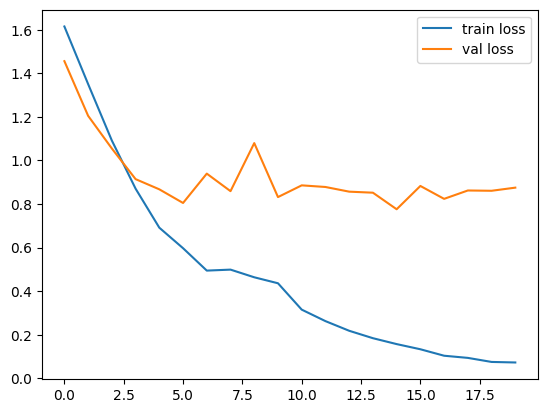

<Figure size 640x480 with 0 Axes>

In [50]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

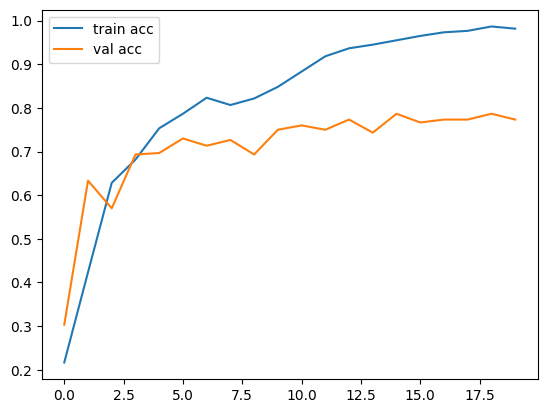

<Figure size 640x480 with 0 Axes>

In [51]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [53]:
img=image.load_img('/content/download.jpeg',target_size=(224,224))

In [57]:
x=image.img_to_array(img)


In [58]:
x = x/255

In [59]:
x.shape

(224, 224, 3)

In [60]:
x = np.expand_dims(x,axis = 0)

In [61]:
x.shape

(1, 224, 224, 3)

In [62]:
model.predict(x)

1/1 [==============================] - 1s 758ms/step


array([[5.7566074e-05, 2.8316806e-06, 6.5196544e-04, 9.7076023e-05,
        9.9919051e-01]], dtype=float32)